# Part 3 Task 1
https://github.com/josStorer/RWKV-Runner/blob/master/README_ZH.md

# World 系列

In [1]:
# 下面这个文件名你可以在 https://huggingface.co/BlinkDL/rwkv-7-world 里确认
# !wget -O models/RWKV-x070-World-0.1B-v2.8-20241210-ctx4096.pth \
#   https://huggingface.co/BlinkDL/rwkv-7-world/resolve/main/RWKV-x070-World-0.1B-v2.8-20241210-ctx4096.pth
# !wget -O models/RWKV-x070-World-0.4B-v2.9-20250107-ctx4096.pth \
#   https://huggingface.co/BlinkDL/rwkv-7-world/resolve/main/RWKV-x070-World-0.4B-v2.9-20250107-ctx4096.pth
# !wget -O models/RWKV-x070-World-1.5B-v3-20250127-ctx4096.pth \
#   https://huggingface.co/BlinkDL/rwkv-7-world/resolve/main/RWKV-x070-World-1.5B-v3-20250127-ctx4096.pth
# !wget -O models/RWKV-x070-World-2.9B-v3-20250211-ctx4096.pth \
#   https://huggingface.co/BlinkDL/rwkv-7-world/resolve/main/RWKV-x070-World-2.9B-v3-20250211-ctx4096.pth

# 正式开始构建这个Pipeline

## 设置路径

In [2]:
# Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
# TODO: Set Your Own Dir toward the "DSGA1011 NLP Final Project"
base_dir = os.path.join('drive', 'MyDrive', 'DSGA1011 NLP Final Project')

In [4]:
# the working dir
working_dir = os.path.join(base_dir, 'RWKV API processing')

# Check whether the file exist, if not, raise error
if not os.path.exists(working_dir):
  raise Exception('The working dir does not exist')
else:
  # Print the file under it
  sub_files = os.listdir(working_dir)
  # add /n to subfiles
  sub_files = "\n".join(sub_files)
  file_info = f"The existing files under {working_dir} are: \n{sub_files}"
  print(file_info)

The existing files under drive/MyDrive/DSGA1011 NLP Final Project/RWKV API processing are: 
models
RWKV-Runner
data
outputs
rwkv_env
requirements.txt
Layerwise Visualization.ipynb
RWKV 模型加载.py
层级激活提取与分析.py
Token 级归因分析.py
端到端管道与 RWKV 集成.py
Download_g1.ipynb
api.log.2 (1)
api.log.1 (1)
outputs_quality
api.log.2
api.log.1
api.log.3
Copy of Tryrunner_for_RACE.ipynb
RWKV-Runner-decouple
api.log
server.log
short_long_examples.json
Tryrunner_hidden.ipynb
Tryrunner_hidden_decouple.ipynb


In [5]:
# Set to working dir
os.chdir(working_dir)

In [6]:
!ls

 api.log			     requirements.txt
 api.log.1			     rwkv_env
'api.log.1 (1)'			     RWKV-Runner
 api.log.2			     RWKV-Runner-decouple
'api.log.2 (1)'			    'RWKV 模型加载.py'
 api.log.3			     server.log
'Copy of Tryrunner_for_RACE.ipynb'   short_long_examples.json
 data				    'Token 级归因分析.py'
 Download_g1.ipynb		     Tryrunner_hidden_decouple.ipynb
'Layerwise Visualization.ipynb'      Tryrunner_hidden.ipynb
 models				     层级激活提取与分析.py
 outputs			    '端到端管道与 RWKV 集成.py'
 outputs_quality


## Initalize and test

In [7]:
# 重设python环境（请选择1）
!update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!update-alternatives --config python3

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.12   2         auto mode
  1            /usr/bin/python3.10   1         manual mode
  2            /usr/bin/python3.12   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
update-alternatives: using /usr/bin/python3.10 to provide /usr/bin/python3 (python3) in manual mode


In [8]:
1
# 重新安装pip
!curl -sS https://bootstrap.pypa.io/get-pip.py | python3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 73.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 65.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pip]


In [9]:
!/usr/bin/python3.10 -m pip install -r RWKV-Runner-decouple/backend-python/requirements.txt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.6/894.6 kB 38.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 145.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 98.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 114.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 81.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 89.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 125.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [10]:
!/usr/bin/python3.10 -m pip install ninja

In [11]:
# Star url
!fuser -k 8000/tcp || true
!/usr/bin/python3.10 RWKV-Runner-decouple/backend-python/main.py --host 0.0.0.0 --port 8000 > server.log 2>&1 &
# !/usr/bin/python3.10 RWKV-Runner/backend-python/main.py --host 0.0.0.0 --port 8000 2>&1 | tee server.log

In [12]:
# API doc
from google.colab import output
docs_url = output.eval_js("google.colab.kernel.proxyPort(8000)") + "/docs"
print("Docs URL:", docs_url)


Docs URL: https://8000-gpu-t4-hm-3vg83qprv8dmo-c.asia-southeast1-0.prod.colab.dev/docs


In [13]:
# # Enable cache
import requests
!/usr/bin/python3.10 -m pip install cyac==1.9
cache_enable_resp = requests.post("http://127.0.0.1:8000/enable-state-cache")
print(cache_enable_resp.status_code, cache_enable_resp.text)
# 200 "success"

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for cyac: filename=cyac-1.9-cp310-cp310-linux_x86_64.whl size=1038230 sha256=60c591cc4faa54205d10c28838e3669377cad7069d8343e5f64810b5921da683
  Stored in directory: /root/.cache/pip/wheels/40/ae/45/9076427b28cf92fb626c2246994afd3aacec5e0c0ce060de1a
Successfully built cyac
200 "success"


In [14]:
# Import
import requests
import json
import time
import re
from tqdm import tqdm

In [15]:
# Test
switch_body = {
    "model": "models/RWKV-x070-World-0.1B-v2.8-20241210-ctx4096.pth",
    "strategy": "cuda fp16",
    "tokenizer": "",
    "customCuda": True,
    "deploy": False
}
r = requests.post("http://127.0.0.1:8000/switch-model", json=switch_body)
print(r.status_code, r.text)
# 200 "success"

200 "success"


## Basic Functions

In [16]:
# Reset memory
def reset_context():
  """Clear server-side conversation memory/state."""
  try:
    resp_reset = requests.post("http://127.0.0.1:8000/forget")
    if resp_reset.status_code != 200:
      resp_reset = requests.post("http://127.0.0.1:8000/reset-state")
      if resp_reset.status_code != 200:
        print(f"[reset_context] Warning: failed to reset context!{resp_reset.text}")
        return

      # print(json.dumps(resp_reset.json(), indent=2))
  except Exception:
    print("[reset_context] Warning: failed to reset context!")

def bulid_chat_body(
  content_list: list,
  model="rwkv",
  max_tokens=128,
  temperature=0.7
    ):

  chat_body = {
    "model": model,
    "messages": [
      {
        "role": "user",
        "content":"\n\n".join(content_list),
        "raw": False
      }
    ],
    "stream": False,
    "max_tokens": max_tokens,
    "temperature": temperature
  }
  return chat_body

def parse_choice_letter(text: str):
  if not text: return None
  split_str = text.strip().splitlines()
  if not split_str: return None
  first = split_str[0]
  m = re.search(r"\b([ABCD])\b", first, flags=re.I)
  return m.group(1).upper() if m else None

# def get_response(chat_body, chat_mode = "chat/completions"):
#   r = requests.post(f"http://127.0.0.1:8000/{chat_mode}", json=chat_body)
#   return r.json()["choices"][0]["message"]["content"]

## QuALITY Dataset


In [17]:
train_QuALITY_path = os.path.join("data", "QuALITY",'QuALITY.v1.0.1.htmlstripped.train')
dev_QuALITY_path = os.path.join("data", "QuALITY",'QuALITY.v1.0.1.htmlstripped.dev')

In [18]:
# Json_iter
def jsonl_iter(path):
  with open(path, "r", encoding="utf-8") as f:
    for i, line in enumerate(f, 1):
      line = line.strip()
      if not line:
        continue
      try:
        yield json.loads(line)
      except Exception as e:
        print(f"[WARN] line {i} parse error: {e}")

def count_lines(path):
  with open(path, "r", encoding="utf-8") as f:
    return sum(1 for _ in f)

# Get iterable value
QuALITY_iter = jsonl_iter(dev_QuALITY_path)
# Peek first record
first = next(QuALITY_iter)
second = next(QuALITY_iter)
print(type(first), list(first.keys()))
# Common keys you may see:
# ['article_id','title','source','year','license','article','questions', ...]

print(f"Totally {count_lines(dev_QuALITY_path)} examples")

<class 'dict'> ['article_id', 'set_unique_id', 'batch_num', 'writer_id', 'source', 'title', 'year', 'author', 'topic', 'article', 'questions', 'url', 'license']
Totally 230 examples


In [19]:
def get_question(record, index):
  max_question_index = len(record["questions"]) - 1
  if index < 0 or index > max_question_index:
    raise ValueError(f"index {index} out of range [0, {max_question_index}]")
  return record["questions"][index]

def get_question_str(question):
  opts = question["options"]
  return "\n".join([
      "Question:",
      question["question"],
      "Options:",
      f"A: {opts[0]}",
      f"B: {opts[1]}",
      f"C: {opts[2]}",
      f"D: {opts[3]}",
  ])

def get_gold(question):
  """
  Try common keys and handle 1-based or 0-based or letter formats.
  """
  CHOICE = ["A","B","C","D"]
  k = "gold_label"
  v = question[k]
  return CHOICE[v-1]
  # if k in q and q[k] is not None:
  #   v = q[k]
  #   if isinstance(v, int):
  #     # 1-based -> 0-based
  #     return CHOICE[v-1]
  # return None

# Print minimal meta + article length
def print_meta(record):
  print("article_id:", record.get("article_id"))
  print("set_unique_id:", record.get("set_unique_id"))
  print("batch_num:", record.get("batch_num"))
  print("writer_id:", record.get("writer_id"))
  print("source:", record.get("source"))
  print("title:", record.get("title"))
  print("year:", record.get("year"))
  print("author:", record.get("author"))
  print("topic:", record.get("topic"))
  print("article_length_chars:", len(record.get("article","")))
  print("num_questions:", len(record.get("questions", [])))

  # Show the first question (with options)
  q0 = get_question(record, 0)
  print(get_question_str(q0))
  print(f"gold={get_gold(q0)}")

  # Sometimes there is a 'difficult' flag per question (HARD subset indicator)
  print("difficult(HARD?) =", q0.get("difficult"))

print_meta(first)
# print_meta(next(QuALITY_iter))

model_dict = {
    "World 0.1B": "RWKV-x070-World-0.1B-v2.8-20241210-ctx4096.pth",
    "World 0.4B": "RWKV-x070-World-0.4B-v2.9-20250107-ctx4096.pth",
    "World 1.5B": "RWKV-x070-World-1.5B-v3-20250127-ctx4096.pth",
    "World 2.9B": "RWKV-x070-World-2.9B-v3-20250211-ctx4096.pth",

    # --- Pile 系列 ---
    "Pile 1.47B": "RWKV-x070-Pile-1.47B-20241210-ctx4096.pth",
    "Pile 421M": "RWKV-x070-Pile-421M-20241127-ctx4096.pth",
    "Pile 168M": "RWKV-x070-Pile-168M-20241120-ctx4096.pth",
    "Pile 165M L25-D576": "RWKV-x070-Pile-165M-L25-D576-20241218-ctx4096.pth",
    "Pile 164M L33-D512": "RWKV-x070-Pile-164M-L33-D512-20241218-ctx4096.pth",

    # # --- g1 系列 ---
    # "g1 0.1B": "rwkv7-g1-0.1b-20250307-ctx4096.pth",
    # "g1 0.4B": "rwkv7-g1-0.4b-20250324-ctx4096.pth",
    # "g1 1.5B": "rwkv7-g1-1.5b-20250429-ctx4096.pth",
    # "g1 2.9B": "rwkv7-g1-2.9b-20250520-ctx4096.pth",
}

def switch_model(version="World 0.1B"):
  model_name = model_dict[version]

  swich_body = {
    "model": f"models/{model_name}",
    "strategy": "cuda fp16",
    "tokenizer": "",
    "customCuda": True,
    "deploy": False
  }

  r = requests.post("http://127.0.0.1:8000/switch-model", json=swich_body)
  if r.status_code != 200:
    print(f"[switch_model] Warning: failed to switch model: {r.text}")
  else:
    print(f"Success: switched to {version}")
    # print(json.dumps(r.json(), indent=2))
  # 200 "success"

article_id: 52845
set_unique_id: 52845_75VB1ISR
batch_num: 11
writer_id: 1001
source: Gutenberg
title: The Girl in His Mind
year: 1950
author: Young, Robert F.
topic: Guilt -- Fiction; Science fiction; PS; Psychological fiction
article_length_chars: 28515
num_questions: 6
Question:
How much time has passed between Blake's night with Eldoria and his search for Sabrina York in his mind-world?
Options:
A: 7 years
B: 10 hours
C: 12 years
D: 1 hour
gold=B
difficult(HARD?) = 0


In [20]:
# # # Switch test
# for model_name in model_dict.keys():
#   switch_model(model_name)
#   # time.sleep(1)

In [21]:
reset_context()
# Prompt test
# rule_setting = (
#         "Return ONLY one letter from {A,B,C,D} on the FIRST line. "
#         "Do not copy the options. Do not add any extra words."
#     )


# example_question = (
#     f"\nExample:"
#     # f"\nPassage:\n {first['article']}"
#     f"\n{get_question_str(get_question(first, 0))}"
#     f"\nAnswer: {get_gold(get_question(first, 0))}"
# )

# cur_question = (
#     f"Passage:\n {second['article']}"
#     f"\n{get_question_str(get_question(second, 0))}"
# )

# end_node = "Your Answer:"
# content_list=[rule_setting, cur_question, example_question, end_node]

# chat_body = bulid_chat_body(content_list, temperature=0.0, max_tokens=100)

# r = requests.post("http://127.0.0.1:8000/chat/completions", json=chat_body,)
# # print(r.status_code)
# print(r.json()["choices"][0]["message"]["content"])

# requests.post("http://127.0.0.1:8000/forget")


# # Warm-up
# warm_up = "You are a careful reasoner. I will provide you with a long passage to read, then answer some MC question.Answer 'OK' if you are ready?\n"
# warm_up_body = bulid_chat_body([warm_up], temperature=0.001, max_tokens=10)
# print(get_response(warm_up_body))

# test_forget = "Do you know what the the passage is?"
# test_forget_body = bulid_chat_body([test_forget], temperature=0.001, max_tokens=10)
# print(get_response(test_forget_body))

# cur = next(QuALITY_iter)
# passage = f"Passage:\n '{cur['article']}' \nDo you know what the the passage is?"
# get_response(bulid_chat_body([passage], temperature=0.001, max_tokens=100))

# question = get_question_str(get_question(cur, 0))
# rule_setting = (
#         "Return ONLY one letter from {A,B,C,D} on the FIRST line. "
#         "Do not copy the options. Do not add any extra words."
#     )
# print(get_response(bulid_chat_body([rule_setting, question, "\nYour Answer:"], temperature=0.001, max_tokens=2)))

In [22]:
switch_model("World 0.1B")

Success: switched to World 0.1B


In [23]:
start_time = time.time()
charater_setting = "You are a careful reasoner. I will provide you with a MC question and a long passage to read\n"
rule_setting = (
        "Return ONLY one letter from {A,B,C,D} on the FIRST line. "
        "Do not copy the options. Do not add any extra words."
    )
example_question = (
    f"\nExample:"
    f"\nPassage:\n {first['article'][:1000]}"
    f"\n{get_question_str(get_question(first, 0))}"
    f"\nAnswer: {get_gold(get_question(first, 0))}"
)

cur_question = (
    f"\nPassage:\n {second['article']}"
    f"\n{get_question_str(get_question(second, 0))}"
    f"\nAnswer:"
)

test_body = bulid_chat_body([charater_setting, rule_setting, example_question, cur_question], max_tokens=2, temperature=0.0)
r = requests.post("http://127.0.0.1:8000/chat/completions", json=test_body)
# print(r.status_code)
result = parse_choice_letter(r.json()["choices"][0]["message"]["content"])
gold = get_gold(get_question(second, 0))
print(f"Raw Output:{r.json()['choices'][0]['message']['content']}")
print(f"PRED: {result}, GOLD: {gold}")

end_time = time.time()
print(f"Total time: {end_time - start_time}s")

Raw Output:
The
PRED: None, GOLD: B
Total time: 0.8732821941375732s


In [24]:
body = {
    "model": "RWKV",
    "messages": [
        {"role": "user", "content": "hello world"}
    ]
}

r = requests.post("http://127.0.0.1:8000/v1/chat/completions", json=body)
print(r.json())


{'object': 'chat.completion', 'model': 'RWKV-x070-World-0.1B-v2.8-20241210-ctx4096', 'choices': [{'message': {'role': 'assistant', 'content': ' Hello, how can I assist you today?'}, 'index': 0, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 8, 'completion_tokens': 9, 'total_tokens': 17}}


In [25]:
import os, sys

# 1. 把 decouple 版 backend-python 加到 sys.path（不是 rwkv_pip 这一层）
sys.path.insert(0, "/content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV API processing/RWKV-Runner-decouple/backend-python")

# 2. 打开 RWKV7 模式（让 RWKV 这个类内部用 RWKV_x070）
os.environ["RWKV_V7_ON"] = "1"

# 3. 用包名导入，而不是 from model import ...
from rwkv_pip.model import RWKV
from rwkv_pip.rwkv_tokenizer import TRIE_TOKENIZER


/usr/local/lib/python3.12/dist-packages/torch/backends/__init__.py:46: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  self.setter(val)



### RWKV-7 "Goose" enabled ###



In [26]:
model_path = "/content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV API processing/models/RWKV-x070-World-0.1B-v2.8-20241210-ctx4096.pth"
model = RWKV(model_path, strategy="cuda fp16")   # 这里就会内部创建 RWKV_x070 实例

# 使用 decouple 版 RWKV-Runner 下的词表
vocab_path = "/content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV API processing/RWKV-Runner-decouple/backend-python/rwkv_pip/rwkv_vocab_v20230424.txt"
tokenizer = TRIE_TOKENIZER(vocab_path)


Loading /content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV API processing/models/RWKV-x070-World-0.1B-v2.8-20241210-ctx4096.pth (cuda fp16)



In [27]:
ids = tokenizer.encode("hello world")   # 注意：这里要是 list[int]

logits, state = model.forward(ids, None, full_output=True)
# 不要再 model.forward_seq(ids, None)



[forward_seq] layer 0 x shape = torch.Size([2, 768])
[forward_seq] layer 1 x shape = torch.Size([2, 768])
[forward_seq] layer 2 x shape = torch.Size([2, 768])
[forward_seq] layer 3 x shape = torch.Size([2, 768])
[forward_seq] layer 4 x shape = torch.Size([2, 768])
[forward_seq] layer 5 x shape = torch.Size([2, 768])
[forward_seq] layer 6 x shape = torch.Size([2, 768])
[forward_seq] layer 7 x shape = torch.Size([2, 768])
[forward_seq] layer 8 x shape = torch.Size([2, 768])
[forward_seq] layer 9 x shape = torch.Size([2, 768])
[forward_seq] layer 10 x shape = torch.Size([2, 768])
[forward_seq] layer 11 x shape = torch.Size([2, 768])


In [28]:
logits, state = model.forward(ids, None, full_output=True)
hidden_layers = model.hidden_to_log   # list of length = n_layer


[forward_seq] layer 0 x shape = torch.Size([2, 768])
[forward_seq] layer 1 x shape = torch.Size([2, 768])
[forward_seq] layer 2 x shape = torch.Size([2, 768])
[forward_seq] layer 3 x shape = torch.Size([2, 768])
[forward_seq] layer 4 x shape = torch.Size([2, 768])
[forward_seq] layer 5 x shape = torch.Size([2, 768])
[forward_seq] layer 6 x shape = torch.Size([2, 768])
[forward_seq] layer 7 x shape = torch.Size([2, 768])
[forward_seq] layer 8 x shape = torch.Size([2, 768])
[forward_seq] layer 9 x shape = torch.Size([2, 768])
[forward_seq] layer 10 x shape = torch.Size([2, 768])
[forward_seq] layer 11 x shape = torch.Size([2, 768])


In [29]:
print(hidden_layers[1])

tensor([[-0.0169, -0.0404,  0.2009,  ...,  0.0380,  0.1099, -0.3523],
        [ 0.0343,  0.0626, -0.0632,  ...,  0.0066, -0.0388,  0.0304]],
       dtype=torch.float16)


In [30]:
# 开启 RWKV-7 decouple 分析日志（只在需要做实验时设置为 True）
model.log_temporal = True
model.log_memory = True



## Part 3.3 - Decoupled Mechanism Analysis（Xavier）

下面这几格就是 **decoupled RWKV-7 两个实验的流水线**：

- **前提**：你已经在上面跑完：挂载 Drive、切到 `working_dir`、导入 `RWKV`、加载 `model` 和 `tokenizer`，并运行了：
  - `model.log_temporal = True`，`model.log_memory = True`
- **本节顺序**：
  1. 用一段较长文本跑一次 `model.forward(...)`，收集 λ 和记忆曲线日志；
  2. **实验 1**：对每层做 λᵏ / λᵛ 统计（W1 / JSD / Δλ 方差 & |Δλ|>ε 比例）；
  3. **实验 2**：画 Memory Persistence 曲线，并计算每层的有效记忆视界。

只要从上到下依次运行这一节的 cell，就能完成两个实验（目前是 **decoupled 模型本身** 的分析）。


In [31]:
# Step 1：选一段较长文本，跑一次 forward，收集 λ 和记忆曲线日志
import numpy as np

# 这里用 QuALITY dev 集第一个样本的 article 作为自然长序列（也可以换成你自己的文本）
sample_text = first["article"]
print("原始字符长度:", len(sample_text))

# 为了避免一次序列太长溢出上下文，这里只取前 512 个 token
ids = tokenizer.encode(sample_text)
print("原始 token 长度:", len(ids))
max_tokens = 512
ids = ids[:max_tokens]
print("截断后 token 长度:", len(ids))

# 跑一次 forward：此时 RWKV_x070 会自动往 temporal_logs / memory_logs 里写入数据
logits, state = model.forward(ids, None, full_output=True)

# 把日志对象拿出来备用
temporal_logs = model.temporal_logs
memory_logs = model.memory_logs

print("收集到的层数 (temporal_logs):", list(temporal_logs.keys()))
print("收集到的层数 (memory_logs):", list(memory_logs.keys()))


原始字符长度: 28515
原始 token 长度: 6888
截断后 token 长度: 512
[forward_seq] layer 0 x shape = torch.Size([512, 768])
[forward_seq] layer 1 x shape = torch.Size([512, 768])
[forward_seq] layer 2 x shape = torch.Size([512, 768])
[forward_seq] layer 3 x shape = torch.Size([512, 768])
[forward_seq] layer 4 x shape = torch.Size([512, 768])
[forward_seq] layer 5 x shape = torch.Size([512, 768])
[forward_seq] layer 6 x shape = torch.Size([512, 768])
[forward_seq] layer 7 x shape = torch.Size([512, 768])
[forward_seq] layer 8 x shape = torch.Size([512, 768])
[forward_seq] layer 9 x shape = torch.Size([512, 768])
[forward_seq] layer 10 x shape = torch.Size([512, 768])
[forward_seq] layer 11 x shape = torch.Size([512, 768])
收集到的层数 (temporal_logs): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
收集到的层数 (memory_logs): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [32]:
# Step 2：实验 1 —— 每层 λᵏ / λᵛ 分布差异 + Channel Specialization
import math

EPSILON = 0.01  # |Δλ| 的阈值，可以按需要调节


def compute_layer_decay_stats(temporal_logs, epsilon=EPSILON, num_bins=50):
  """对每一层，基于 λᵏ / λᵛ 的日志做简单统计：W1 / JSD / Var(Δλ) / frac(|Δλ|>ε)。
  这里用排序 + 直方图的方式手工实现，不依赖 SciPy。
  """
  stats = []
  for layer_id in sorted(temporal_logs.keys()):
    logs = temporal_logs[layer_id]
    lambda_k = logs["lambda_k"].numpy()  # [T, C]
    lambda_v = logs["lambda_v"].numpy()  # [T, C]

    # 1) 展平时间和通道，得到一维样本
    lk_flat = lambda_k.reshape(-1)
    lv_flat = lambda_v.reshape(-1)

    # 2) 1D Wasserstein-1：用分位数差的平均绝对值近似
    n = min(len(lk_flat), len(lv_flat))
    if n > 0:
      q = np.linspace(0.0, 1.0, n, endpoint=False)
      lk_q = np.quantile(lk_flat, q)
      lv_q = np.quantile(lv_flat, q)
      w1 = float(np.mean(np.abs(lk_q - lv_q)))
    else:
      w1 = float("nan")

    # 3) JSD：把两组样本投到同一组直方图上
    v_min = float(min(lk_flat.min(), lv_flat.min()))
    v_max = float(max(lk_flat.max(), lv_flat.max()))
    if v_max == v_min:
      jsd = 0.0
    else:
      p_hist, bin_edges = np.histogram(lk_flat, bins=num_bins, range=(v_min, v_max), density=True)
      q_hist, _ = np.histogram(lv_flat, bins=bin_edges, density=True)
      p = p_hist + 1e-8
      qv = q_hist + 1e-8
      m = 0.5 * (p + qv)
      kl_pm = float(np.sum(p * np.log(p / m)))
      kl_qm = float(np.sum(qv * np.log(qv / m)))
      jsd = 0.5 * (kl_pm + kl_qm)

    # 4) Channel-level Δλ：取最后一步的 λᵏ / λᵛ 作为该通道代表
    delta_lambda = lambda_k[-1] - lambda_v[-1]  # [C]
    var_delta = float(np.var(delta_lambda))
    frac_large = float(np.mean(np.abs(delta_lambda) > epsilon))

    stats.append({
        "layer": layer_id,
        "W1": w1,
        "JSD": jsd,
        "Var_delta": var_delta,
        "Frac_|dλ|>eps": frac_large,
    })

  return stats


decay_stats = compute_layer_decay_stats(temporal_logs, epsilon=EPSILON)

print(f"使用 epsilon = {EPSILON}")
print("layer |     W1      |     JSD     |  Var(Δλ)   | frac(|Δλ|>eps)")
for s in decay_stats:
  print(f"{s['layer']:5d} | {s['W1']:.4e} | {s['JSD']:.4e} | {s['Var_delta']:.4e} | {s['Frac_|dλ|>eps']:.3f}")


使用 epsilon = 0.01
layer |     W1      |     JSD     |  Var(Δλ)   | frac(|Δλ|>eps)
    0 | 4.6985e-01 | 1.9652e+01 | 2.4147e-01 | 0.914
    1 | 6.5792e-01 | 2.9824e+01 | 6.3832e-02 | 1.000
    2 | 5.8404e-01 | 2.5693e+01 | 1.0146e-01 | 0.999
    3 | 7.0620e-01 | 2.9533e+01 | 4.9258e-02 | 0.999
    4 | 7.5658e-01 | 3.1214e+01 | 5.2650e-02 | 1.000
    5 | 5.3029e-01 | 2.0799e+01 | 1.8011e-01 | 0.993
    6 | 6.9149e-01 | 2.8572e+01 | 8.0950e-02 | 0.997
    7 | 5.8523e-01 | 2.4405e+01 | 1.4274e-01 | 0.993
    8 | 5.7695e-01 | 2.4449e+01 | 1.6093e-01 | 0.993
    9 | 7.0212e-01 | 2.9667e+01 | 8.2886e-02 | 0.999
   10 | 5.2634e-01 | 2.5759e+01 | 1.2947e-01 | 0.996
   11 | 5.3607e-01 | 2.5722e+01 | 1.2740e-01 | 0.995


使用 THETA = 0.1
layer | T_D (D_hat<th) | T_N (N_hat<th)
    0 |            512 |             32
    1 |            512 |            512
    2 |            512 |            512
    3 |            512 |            512
    4 |            512 |            325
    5 |            512 |            512
    6 |            512 |            512
    7 |            512 |            512
    8 |            512 |            512
    9 |            512 |            512
   10 |            512 |            512
   11 |            512 |            512


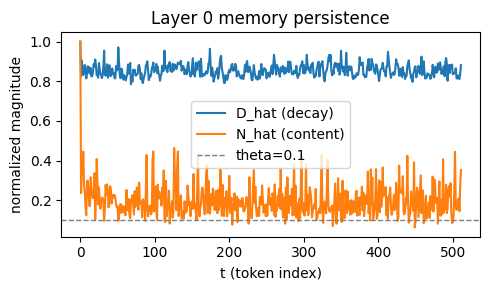

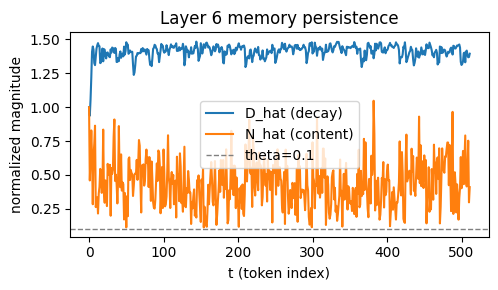

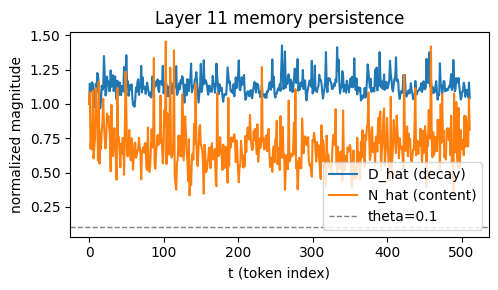

In [33]:
# Step 3：实验 2 —— Memory Persistence 曲线 + 有效记忆视界
import matplotlib.pyplot as plt

THETA = 0.1  # 归一化后的阈值，< THETA 视为 "记忆衰减到很弱"


def compute_memory_horizon(memory_logs, theta=THETA):
  """对每一层，基于 D_t / N_t 曲线估计记忆视界。"""
  horizons = {}
  for layer_id in sorted(memory_logs.keys()):
    logs = memory_logs[layer_id]
    D_t = logs["D_t"].numpy()  # [T]
    N_t = logs["N_t"].numpy()  # [T]

    # 归一化（相对第一个时间步）
    D_hat = D_t / max(abs(D_t[0]), 1e-8)
    N_hat = N_t / max(abs(N_t[0]), 1e-8)

    def first_below(curve, thr):
      for t, v in enumerate(curve):
        if v < thr:
          return t
      return len(curve)

    horizons[layer_id] = {
        "T_D": first_below(D_hat, theta),
        "T_N": first_below(N_hat, theta),
        "D_hat": D_hat,
        "N_hat": N_hat,
    }
  return horizons


def plot_memory_curves(horizons, layers_to_plot=None):
  """画出若干层的 D_hat / N_hat 曲线，直观感受记忆衰减速度。"""
  all_layers = sorted(horizons.keys())
  if layers_to_plot is None:
    # 默认选前一层、中间一层、最后一层
    layers_to_plot = [all_layers[0], all_layers[len(all_layers)//2], all_layers[-1]]

  for layer_id in layers_to_plot:
    h = horizons[layer_id]
    D_hat = h["D_hat"]
    N_hat = h["N_hat"]
    plt.figure(figsize=(5, 3))
    plt.plot(D_hat, label="D_hat (decay)")
    plt.plot(N_hat, label="N_hat (content)")
    plt.axhline(THETA, color="gray", linestyle="--", linewidth=1, label=f"theta={THETA}")
    plt.title(f"Layer {layer_id} memory persistence")
    plt.xlabel("t (token index)")
    plt.ylabel("normalized magnitude")
    plt.legend()
    plt.tight_layout()
    plt.show()


# 计算所有层的记忆视界，并打印
horizons = compute_memory_horizon(memory_logs, theta=THETA)
print(f"使用 THETA = {THETA}")
print("layer | T_D (D_hat<th) | T_N (N_hat<th)")
for lid in sorted(horizons.keys()):
  h = horizons[lid]
  print(f"{lid:5d} | {h['T_D']:14d} | {h['T_N']:14d}")

# 画出几层的记忆曲线
plot_memory_curves(horizons)


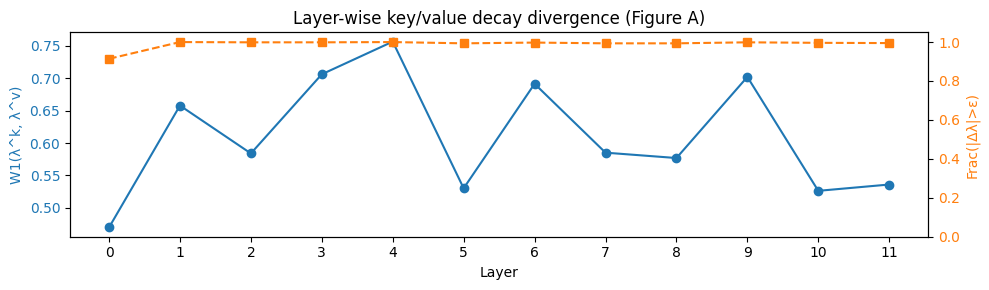

In [38]:
# Figure A：Layer-wise key/value decay divergence (for poster)
import matplotlib.pyplot as plt

# 从上一格 Step 2 计算得到的 decay_stats 中提取数据
layers_figA = [s["layer"] for s in decay_stats]
W1_figA = [s["W1"] for s in decay_stats]
frac_large_figA = [s["Frac_|dλ|>eps"] for s in decay_stats]

fig, ax1 = plt.subplots(figsize=(10, 3))

color1 = "tab:blue"
ax1.set_xlabel("Layer")
ax1.set_ylabel("W1(λ^k, λ^v)", color=color1)
ax1.plot(layers_figA, W1_figA, marker="o", color=color1)
ax1.tick_params(axis="y", labelcolor=color1)
ax1.set_xticks(layers_figA)

# 在同一张图上，用第二个 y 轴画 frac(|Δλ|>eps)
ax2 = ax1.twinx()
color2 = "tab:orange"
ax2.set_ylabel("Frac(|Δλ|>ε)", color=color2)
ax2.plot(layers_figA, frac_large_figA, marker="s", linestyle="--", color=color2)
ax2.tick_params(axis="y", labelcolor=color2)
ax2.set_ylim(0.0, 1.05)

plt.title("Layer-wise key/value decay divergence (Figure A)")
fig.tight_layout()
plt.show()


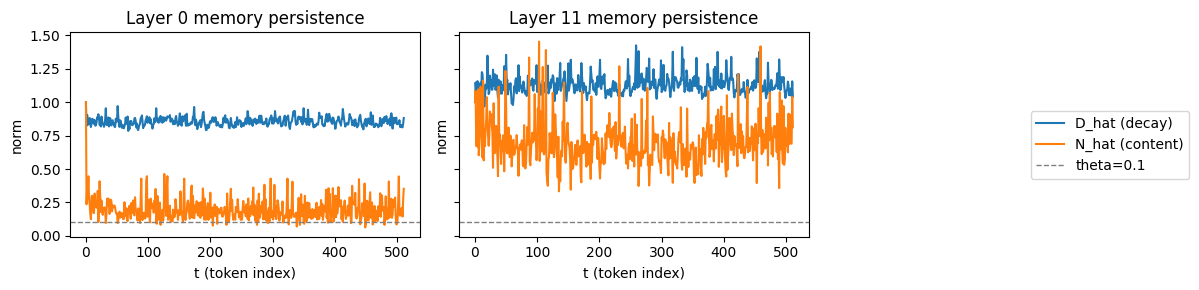

In [37]:
# Figure B：Memory persistence at lower vs higher layers (for poster)
import matplotlib.pyplot as plt

# 这里复用 Step 3 中已经计算好的 horizons 字典
layers_to_plot_figB = [0, max(horizons.keys())]  # 底层和最高层，例如 0 和 11

# 横向排布子图：1 行、N 列，并留出右侧空白放图例
fig, axes = plt.subplots(1, len(layers_to_plot_figB), figsize=(10, 3), sharey=True)
if len(layers_to_plot_figB) == 1:
  axes = [axes]

for ax, layer_id in zip(axes, layers_to_plot_figB):
  h = horizons[layer_id]
  D_hat = h["D_hat"]
  N_hat = h["N_hat"]
  t = range(len(D_hat))

  ax.plot(t, D_hat, label="D_hat (decay)", color="tab:blue")
  ax.plot(t, N_hat, label="N_hat (content)", color="tab:orange")
  ax.axhline(THETA, color="gray", linestyle="--", linewidth=1, label=f"theta={THETA}")
  ax.set_ylabel("norm")
  ax.set_title(f"Layer {layer_id} memory persistence")
  ax.set_xlabel("t (token index)")

# 统一图例放到右侧，不与图片重合
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="center left", bbox_to_anchor=(1.02, 0.5))
fig.tight_layout(rect=[0, 0, 0.82, 1])
plt.show()
